In [1]:
import numpy as np
import time, os, sys
import mxnet as mx
import matplotlib.pyplot as plt
import glob
import sys
sys.path.insert(0,'/github/cellpose/')
from cellpose import models, utils

# check if GPU working, and if so use it
use_gpu = utils.use_gpu()
if use_gpu:
    device = mx.gpu()
else:
    device = mx.cpu()

# model_type='cyto' or model_type='nuclei'
model = models.Cellpose(device, model_type='cyto')

# list of files
files = ['/github/cellpose_web/static/images/img00.png', 
         '/github/cellpose_web/static/images/img01.png']

imgs = [plt.imread(f) for f in files]
nimg = len(imgs)

# define CHANNELS to run segementation on
# grayscale=0, R=1, G=2, B=3
# channels = [cytoplasm, nucleus]
# if NUCLEUS channel does not exist, set the second channel to 0
channels = [[2,3], [0,0]]
# IF ALL YOUR IMAGES ARE THE SAME TYPE, you can give a list with 2 elements
# channels = [0,0] # IF YOU HAVE GRAYSCALE
# channels = [2,3] # IF YOU HAVE G=cytoplasm and B=nucleus
# channels = [2,1] # IF YOU HAVE G=cytoplasm and R=nucleus

# if rescale is set to None, the size of the cells is estimated on a per image basis
# if you want to set the size yourself, set it to 30. / average_cell_diameter
masks, flows, styles, diams = model.eval(imgs, rescale=None, channels=channels)


Downloading: "http://www.cellpose.org/models/cyto_0" to /media/carsen/DATA2/Github/cellpose/cellpose/models/cyto_0
100%|██████████| 25.2M/25.2M [00:00<00:00, 58.0MB/s]
Downloading: "http://www.cellpose.org/models/cyto_1" to /media/carsen/DATA2/Github/cellpose/cellpose/models/cyto_1
100%|██████████| 25.2M/25.2M [00:00<00:00, 54.8MB/s]
Downloading: "http://www.cellpose.org/models/cyto_2" to /media/carsen/DATA2/Github/cellpose/cellpose/models/cyto_2
100%|██████████| 25.2M/25.2M [00:00<00:00, 56.2MB/s]
Downloading: "http://www.cellpose.org/models/cyto_3" to /media/carsen/DATA2/Github/cellpose/cellpose/models/cyto_3
100%|██████████| 25.2M/25.2M [00:00<00:00, 54.9MB/s]
Downloading: "http://www.cellpose.org/models/size_cyto_0.npy" to /media/carsen/DATA2/Github/cellpose/cellpose/models/size_cyto_0.npy
100%|██████████| 3.55k/3.55k [00:00<00:00, 4.87MB/s]
Downloading: "http://www.cellpose.org/models/nuclei_0" to /media/carsen/DATA2/Github/cellpose/cellpose/models/nuclei_0
100%|██████████| 25.2M/

estimated cell diameters for all images


100%|██████████| 2/2 [00:11<00:00,  5.80s/it]


In [2]:
models

<module 'cellpose.models' from '/media/carsen/DATA2/Github/cellpose/cellpose/models.py'>

In [18]:
from cellpose import plot
import imp
imp.reload(plot)
dat = np.load('/media/carsen/DATA2/grive/cellpose/images_cyto/001_img_seg.npy', allow_pickle=True).item()

# plot image with masks overlaid
RGB = plot.mask_overlay(dat['img'], dat['masks']+1,
                        colors=np.array(dat['colors']))

# plot image with outlines overlaid in red (can change color of outline)
RGB = plot.outline_overlay(dat['img'], dat['outlines']+1,
                           channels=dat['chan_choose'], color=[255,0,0])

In [16]:
dat['img'].shape

(383, 512, 2)

In [12]:
dat['img'].min()

0.0

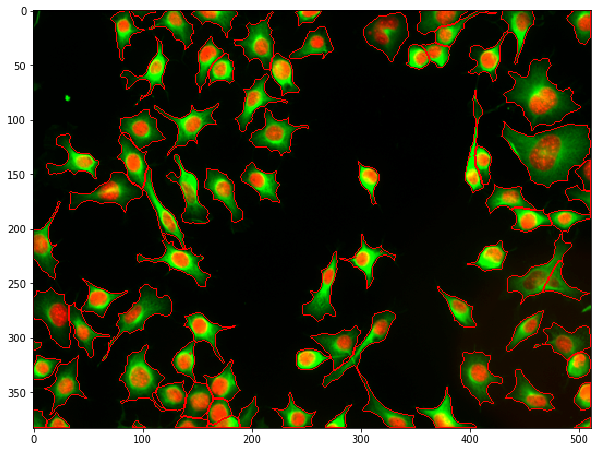

In [20]:
plt.figure(figsize=(10,10))
plt.imshow(RGB)

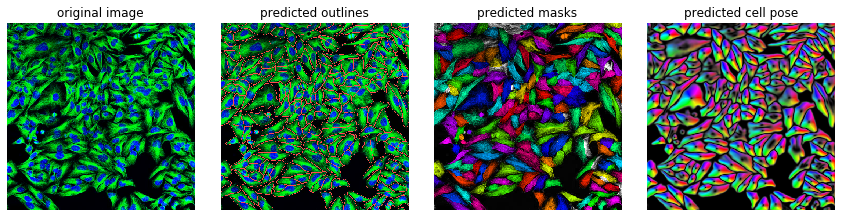

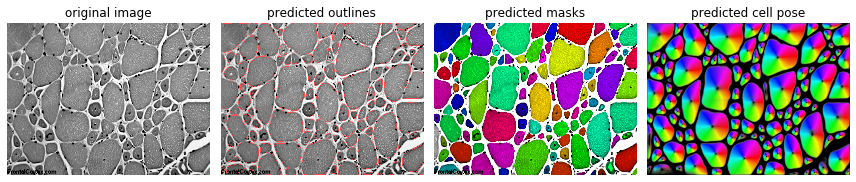

In [15]:
from cellpose import plot, transforms

for idx in range(nimg):
    img = transforms.reshape(imgs[idx], channels[idx])
    img = plot.rgb_image(img)
    maski = masks[idx]
    flowi = flows[idx][0]

    fig = plt.figure(figsize=(12,3))
    # can save images (set save_dir=None if not)
    plot.show_segmentation(fig, img, maski, flowi)
    plt.tight_layout()
    plt.show()